# Python For Data Analysis
## Class 3

The objectives of this class are for y'all to have:

1. Learned a few more useful `pandas` patterns
2. Generated some plots with seaborn
3. Done some more exploratory data analysis on your own
4. Ran a linear regression (?)

In [1]:
import pandas as pd # use 'as' keyword to namespace a package
import numpy as np
complaints = pd.read_csv('../pandas-cookbook/data/311-service-requests.csv', low_memory=False)


In [2]:
useful_cols = ['Created Date', 
               'Closed Date',
               'Due Date', 
               'Agency',
               'Facility Type',
               'Agency Name', 
               'Complaint Type', 
               'Borough', 
               'Status', 
               'Descriptor']
cleaned = complaints[useful_cols]
cleaned = cleaned.rename(columns=lambda x: x.lower().replace(' ','_'))

In [3]:
cleaned.head()

,created_date,closed_date,due_date,agency,facility_type,agency_name,complaint_type,borough,status,descriptor
0,10/31/2013 02:08:41 AM,NaN,10/31/2013 10:08:41 AM,NYPD,Precinct,New York City Police Department,Noise - Street/Sidewalk,QUEENS,Assigned,Loud Talking
1,10/31/2013 02:01:04 AM,NaN,10/31/2013 10:01:04 AM,NYPD,Precinct,New York City Police Department,Illegal Parking,QUEENS,Open,Commercial Overnight Parking
2,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,10/31/2013 10:00:24 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,MANHATTAN,Closed,Loud Music/Party
3,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,10/31/2013 09:56:23 AM,NYPD,Precinct,New York City Police Department,Noise - Vehicle,MANHATTAN,Closed,Car/Truck Horn
4,10/31/2013 01:53:44 AM,NaN,11/30/2013 01:53:44 AM,DOHMH,NaN,Department of Health and Mental Hygiene,Rodent,MANHATTAN,Pending,Condition Attracting Rodents


## Last Week's Exercise

Write a function that takes a column name, a number n, and a dataframe as an argument, and returns a column with the top n categories and all other categories as "other"

In [4]:
def top_n(col_name, top_n, df):
    # Get the value counts of our column name from our DF
    value_counts = df[col_name].value_counts()
    if len(value_counts) <= top_n:
        print("""WARNING: There are fewer distinct categories in df[%s] than requested. 
              No $replacement performed""", col_name)
        return df[col_name] # Do no replacement, return the column
    keep_vals = list(value_counts.head(top_n).index) # Get the top_n rows from value_counts
    keep_mask = df[col_name].isin(keep_vals) # Identify the "keeper" rows
    new_x = df[col_name].copy() # Copy to prevent in-place editing
    new_x[~keep_mask] = 'other' # Negate the mask to identify those we want to replace
    replace_count = len(value_counts) - top_n
    print("Replaced %s values" % replace_count)
    return(new_x)    

### Time to resolution

In [5]:
### Creating a column with time-to-close
# pd.options.mode.chained_assignment = None
cleaned.dtypes
cleaned['created_date'] = pd.to_datetime(cleaned['created_date'])
cleaned['closed_date'] = pd.to_datetime(cleaned['closed_date'])
cleaned.head()

,created_date,closed_date,due_date,agency,facility_type,agency_name,complaint_type,borough,status,descriptor
0,2013-10-31 02:08:41,NaT,10/31/2013 10:08:41 AM,NYPD,Precinct,New York City Police Department,Noise - Street/Sidewalk,QUEENS,Assigned,Loud Talking
1,2013-10-31 02:01:04,NaT,10/31/2013 10:01:04 AM,NYPD,Precinct,New York City Police Department,Illegal Parking,QUEENS,Open,Commercial Overnight Parking
2,2013-10-31 02:00:24,2013-10-31 02:40:32,10/31/2013 10:00:24 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,MANHATTAN,Closed,Loud Music/Party
3,2013-10-31 01:56:23,2013-10-31 02:21:48,10/31/2013 09:56:23 AM,NYPD,Precinct,New York City Police Department,Noise - Vehicle,MANHATTAN,Closed,Car/Truck Horn
4,2013-10-31 01:53:44,NaT,11/30/2013 01:53:44 AM,DOHMH,NaN,Department of Health and Mental Hygiene,Rodent,MANHATTAN,Pending,Condition Attracting Rodents


In [6]:
cleaned.dtypes

created_date      datetime64[ns]
closed_date       datetime64[ns]
due_date                  object
agency                    object
facility_type             object
agency_name               object
complaint_type            object
borough                   object
status                    object
descriptor                object
dtype: object

In [7]:
cleaned['time_to_resolution'] = (cleaned['closed_date'] - cleaned['created_date']) / np.timedelta64(1, 'm')
cleaned.head(20)

,created_date,closed_date,due_date,agency,facility_type,agency_name,complaint_type,borough,status,descriptor,time_to_resolution
0,2013-10-31 02:08:41,NaT,10/31/2013 10:08:41 AM,NYPD,Precinct,New York City Police Department,Noise - Street/Sidewalk,QUEENS,Assigned,Loud Talking,NaN
1,2013-10-31 02:01:04,NaT,10/31/2013 10:01:04 AM,NYPD,Precinct,New York City Police Department,Illegal Parking,QUEENS,Open,Commercial Overnight Parking,NaN
2,2013-10-31 02:00:24,2013-10-31 02:40:32,10/31/2013 10:00:24 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,MANHATTAN,Closed,Loud Music/Party,40.133333
3,2013-10-31 01:56:23,2013-10-31 02:21:48,10/31/2013 09:56:23 AM,NYPD,Precinct,New York City Police Department,Noise - Vehicle,MANHATTAN,Closed,Car/Truck Horn,25.416667
4,2013-10-31 01:53:44,NaT,11/30/2013 01:53:44 AM,DOHMH,NaN,Department of Health and Mental Hygiene,Rodent,MANHATTAN,Pending,Condition Attracting Rodents,NaN
5,2013-10-31 01:46:52,NaT,10/31/2013 09:46:52 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,QUEENS,Open,Banging/Pounding,NaN
6,2013-10-31 01:46:40,NaT,10/31/2013 09:46:40 AM,NYPD,Precinct,New York City Police Department,Blocked Driveway,QUEENS,Assigned,No Access,NaN
7,2013-10-31 01:44:19,2013-10-31 01:58:49,10/31/2013 09:44:19 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,QUEENS,Closed,Loud Music/Party,14.500000
8,2013-10-31 01:44:14,2013-10-31 02:28:04,10/31/2013 09:44:14 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,MANHATTAN,Closed,Loud Talking,43.833333
9,2013-10-31 01:34:41,2013-10-31 02:23:51,10/31/2013 09:34:41 AM,NYPD,Precinct,New York City Police Department,Noise - Commercial,BROOKLYN,Closed,Loud Music/Party,49.166667


### Basic Aggregations

In [8]:
# group our data by complaint type
by_complaint = cleaned.groupby('complaint_type')

In [9]:
# average response time
by_complaint['time_to_resolution'].mean()

complaint_type
APPLIANCE                                      3730.909091
Adopt-A-Basket                                 1446.000000
Agency Issues                                          NaN
Air Quality                                    1516.666667
Animal Abuse                                    223.147866
Animal Facility - No Permit                            NaN
Animal in a Park                               3260.302000
Asbestos                                       1542.030556
BEST/Site Safety                                346.853667
Beach/Pool/Sauna Complaint                    28063.312500
Benefit Card Replacement                          0.602283
Bike Rack Condition                            8601.200000
Bike/Roller/Skate Chronic                       126.328646
Blocked Driveway                                179.920552
Boilers                                                NaN
Bridge Condition                               1376.686842
Broken Muni Meter                        

In [10]:
###cleaned.loc[cleaned['time_to_resolution']<0,:].head()

Exercise:
  * What's going on with negative time-to-resolution?
  * Determine which types of complaints are most often late (closed_date > due_date)
      * Which types of complaints have the highest *percentage* of late calls?
  * From which boroughs?


### More advanced Data Manipulations with Pandas

In pandas, the split-apply-combine pattern is one of the most powerful but least understood features of the tool. In fact, I don't even understand it very well, but we'll struggle through it together.

We'll cover a few operations *in brief* with specific emphasis on
* Indexes in pandas
* groupby objects
* unstack
* pivot_table


#### Indexes in pandas
Indexes are convenient ways to keep track of the *grain* (i.e., what defines a "row") in a dataframe. Dataframes have the ability to have multiple indexes which allow for slicing-and-dicing in very sophisticated ways. Unfortunately this can also means there's a lot of complexity which can be overwhelming for people who are new to the framework.

The thing to keep in mind is that indexes are **not** columns just like any other. They must be accessed (and manged) differently.

#### Groupby

As we saw above, we can use `groupby()` to summarize our data. The object returned by `groupby()` is not a dataframe -- in fact, it's more like 'instructions for grouping' than actual grouped data.

```python
grpd = cleaned.groupby('Status')
# <pandas.core.groupby.DataFrameGroupBy object at 0x113aeada0>
```

Only when we apply some sort of function to perform an aggregation do we actually get results back

```python
grpd['Status'].count()

Status
Assigned       6189
Closed        57165
Email Sent      129
Open          43972
Pending        3165
Started         447
Unassigned        2
Name: Status, dtype: int64
```

When we group-by data, the column we're grouping by becomes the index of the object we're returning (rather than a column of a table. Because we're now working explicitly with indexes (and sometimes multiple indexes!) it'll be helpful to look at some of the index-specific methods available to us.


#### Unstack

If we group by multiple columns, we'll get data back with multiple indexes. We can "unstack" these indexes to get more tabular data

In [11]:
b_s = cleaned.groupby(['borough','status'])['status'].count()
print(b_s.head(20))
print("----------------------------")
print("Now Unstack!")
print("----------------------------")
print(b_s.unstack())

borough    status  
BRONX      Assigned      909
           Closed       7885
           Open         9925
           Pending       903
           Started        64
BROOKLYN   Assigned     1720
           Closed      15967
           Open        14224
           Pending       847
           Started       132
MANHATTAN  Assigned     1703
           Closed      12087
           Open         9920
           Pending       477
           Started       101
QUEENS     Assigned     1478
           Closed      12313
           Open         7578
           Pending       783
           Started       129
Name: status, dtype: int64
----------------------------
Now Unstack!
----------------------------
status         Assigned   Closed  Email Sent     Open  Pending  Started  \
borough                                                                   
BRONX             909.0   7885.0         NaN   9925.0    903.0     64.0   
BROOKLYN         1720.0  15967.0         NaN  14224.0    847.0    132.0   
MA

Our "unstacked" object now looks like tabular data that are much easier to work with

#### Pivot Table

"Pivot tables" are a powerful tool very common in the world of spreadsheet-first data analytics. In fact, when analysts are first making the move from excel to python or R pivot tables are the feature they miss the most (and they generally find the in-code approximations of these tools overly burdensome). Pandas, nicely, has an API that feels familiar to this flavor of analysis.





flights_by_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

In [12]:
status_by_borough = cleaned.pivot_table(index="status", columns="borough", values="created_date", aggfunc="count")
status_by_borough.head(30)

borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
status,,,,,,
Assigned,909.0,1720.0,1703.0,1478.0,245.0,134.0
Closed,7885.0,15967.0,12087.0,12313.0,2613.0,6300.0
Email Sent,NaN,NaN,NaN,NaN,NaN,129.0
Open,9925.0,14224.0,9920.0,7578.0,1819.0,506.0
Pending,903.0,847.0,477.0,783.0,120.0,35.0
Started,64.0,132.0,101.0,129.0,20.0,1.0
Unassigned,NaN,NaN,NaN,NaN,NaN,2.0


Exercise: 
* plot a line chart with complaints by day by borough (time on the x axis, one line per borough)

```python
# complaints[['Unique Key', 'Borough']].groupby([complaints.index.date, 'Borough']).count().unstack().plot()
```

## More Plotting with Seaborn

In [13]:
!pip install seaborn

  Using cached scipy-0.19.0-cp35-cp35m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [17]:
%matplotlib inline
import seaborn as sns
pd.options.mode.chained_assignment = None

Replaced 15 values


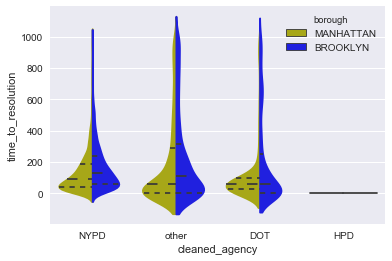

In [18]:
# Do this part interactively
bk_manh = cleaned.loc[cleaned['borough'].isin(['BROOKLYN', 'MANHATTAN'])]
x = top_n('agency', 3, bk_manh).copy()
bk_manh.loc[:,'cleaned_agency'] = x
bk_manh = bk_manh.loc[bk_manh['time_to_resolution'] >= 0]
bk_manh = bk_manh.loc[bk_manh['time_to_resolution'] <= 1000]

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="cleaned_agency", y="time_to_resolution", hue="borough", data=bk_manh, split=True,
               inner="quart", palette={"BROOKLYN": "b", "MANHATTAN": "y"})
sns.despine(left=True)

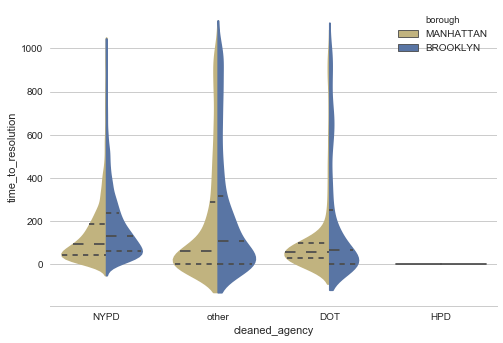

In [19]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="cleaned_agency", y="time_to_resolution", hue="borough", data=bk_manh, split=True,
               inner="quart", palette={"BROOKLYN": "b", "MANHATTAN": "y"})
sns.despine(left=True)

In [ ]:
# Navigate to http://seaborn.pydata.org/tutorial/categorical.html and try out some of the categorical 
# plotting options with seaborn

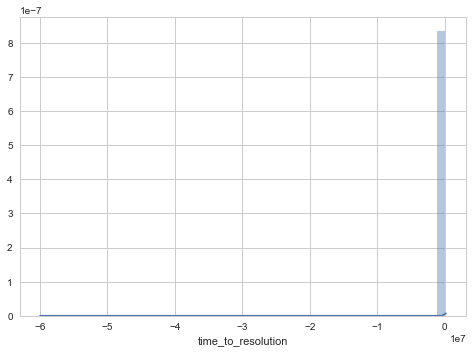

In [26]:
sns.distplot(cleaned['time_to_resolution'].dropna())

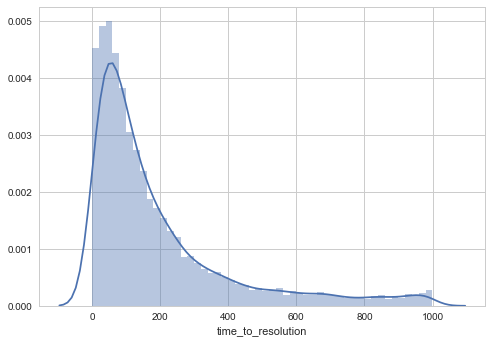

In [25]:
no_zeroes = bk_manh.loc[bk_manh['time_to_resolution'] > 0]
sns.distplot(no_zeroes['time_to_resolution'].dropna())

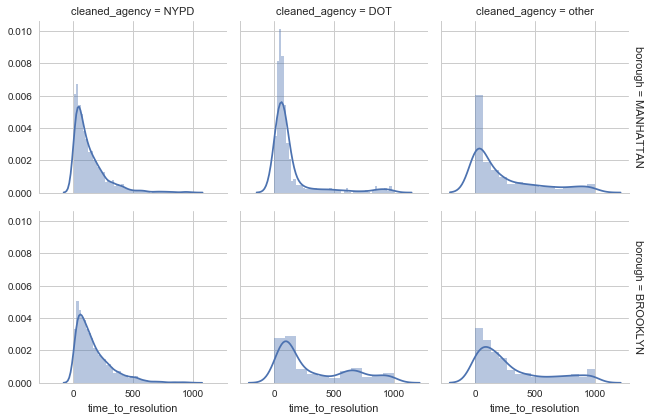

In [30]:
g = sns.FacetGrid(no_zeroes, row='borough', col='cleaned_agency', margin_titles=True)
g.map(sns.distplot, "time_to_resolution")
sns.plt.show()

# Simple Linear Regression

In [31]:
# Find the coordinates of time square
# Append column to df with distance to time square
# Make a scatter plot
# Introduce simple linear regression
# Give intuitive explanation